In [13]:
import argparse
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

from colon3d.alg.tracks_loader import DetectionsTracker
from colon3d.util.data_util import SceneLoader
from colon3d.util.general_util import (
    create_empty_folder,
    save_video_from_frames_list,
)


In [14]:
load_scene_path = Path("/mnt/disk1/data/my_videos/Example_4")
save_scene_path = Path("/mnt/disk1/data/my_videos/Example_4_processed")
alg_fov_ratio = 0.8
n_frames_lim = 0

In [15]:
scene_loader = SceneLoader(
    scene_path=load_scene_path,
    n_frames_lim=n_frames_lim,
    alg_fov_ratio=alg_fov_ratio,
)

detections_tracker = DetectionsTracker(
    scene_path=load_scene_path,
    scene_loader=scene_loader,
)

Loading meta-data from /mnt/disk1/data/my_videos/Example_4/meta_data.yaml
Frames per second: 30
Original image size: 1225x966
Algorithm-view image size: 773x774
Using all 751 frames of the video...
Loaded detections from:  /mnt/disk1/data/my_videos/Example_4/Tracks.csv


Number of frames in view: 408
Out of view segments:
Out of view segment #0: {'first': 0, 'last': 41}
Out of view segment #1: {'first': 83, 'last': 100}
Out of view segment #2: {'first': 120, 'last': 121}
Out of view segment #3: {'first': 135, 'last': 137}
Out of view segment #4: {'first': 153, 'last': 171}
Out of view segment #5: {'first': 211, 'last': 246}
Out of view segment #6: {'first': 278, 'last': 317}
Out of view segment #7: {'first': 362, 'last': 382}
Out of view segment #8: {'first': 429, 'last': 449}
Out of view segment #9: {'first': 492, 'last': 509}
Out of view segment #10: {'first': 523, 'last': 524}
Out of view segment #11: {'first': 526, 'last': 528}
Out of view segment #12: {'first': 553, 'last': 576}
Out of view segment #13: {'first': 609, 'last': 643}
Out of view segment #14: {'first': 666, 'last': 698}
Out of view segment #15: {'first': 709, 'last': 712}
Out of view segment #16: {'first': 713, 'last': 750}


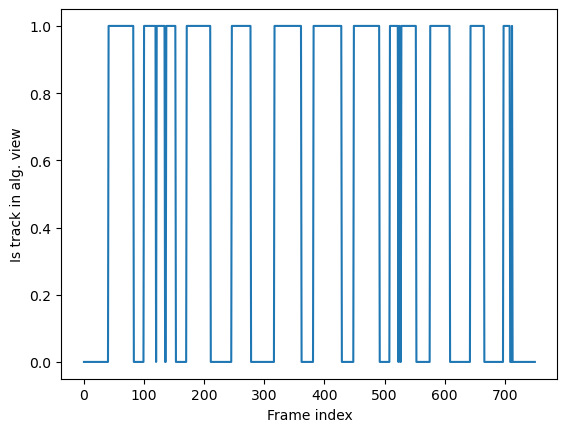

In [16]:

n_frames = scene_loader.n_frames
# if track is in view, then 1, else 0
is_in_view = np.zeros(n_frames, dtype=bool)

# save the start and end frame indexes of each out-of-view segment as list
out_of_view_segments = []

for i_frame in range(n_frames):
    # Get the targets tracks in the current frame inside the algorithmic field of view
    tracks = detections_tracker.get_tracks_in_frame(i_frame, frame_type="alg_view")
    is_in_view[i_frame] = len(tracks) > 0
    if is_in_view[i_frame]:
        # if current frame is in view and previous frame was out of view, save the end of the out-of-view segment
        if i_frame > 0 and not is_in_view[i_frame - 1]:
            out_of_view_segments[-1]["last"] = i_frame
    else:            
        # if current frame is out of view and it is frame 0 or if the previous frame was in view, save the start of the out-of-view segment
        if i_frame == 0 or (i_frame > 0 and is_in_view[i_frame - 1]):
            out_of_view_segments.append({"first": i_frame, "last": None})
    # if we reached the last frame and it is not in view, save the end of the out-of-view segment
    if i_frame == n_frames - 1 and not is_in_view[i_frame]:
        out_of_view_segments[-1]["last"] = i_frame


# plot the number of tracks per frame
plt.figure()
plt.plot(is_in_view)
plt.xlabel("Frame index")
plt.ylabel("Is track in alg. view")

n_frames_in_view = np.sum(is_in_view)
print(f"Number of frames in view: {n_frames_in_view}")

print("Out of view segments:")
for i_seg, segment in enumerate(out_of_view_segments):
    print(f"Out of view segment #{i_seg}: {segment}")
    


In [17]:

# loop over all frames and saved them as images

rgb_frames = []
fps = scene_loader.fps

# save the frames
frames_out_path = save_scene_path / "Frames"
create_empty_folder(frames_out_path, save_overwrite=False)

for i_frame in range(n_frames):
    print(f"i_frame={i_frame}/{n_frames}", end="\r", flush=True)
    im = scene_loader.get_frame_at_index(i_frame, frame_type="full")
    rgb_frames.append(im)

# save the video
save_video_from_frames_list(save_path=save_scene_path / "Video_New", frames=rgb_frames, fps=fps)


Saving video to /mnt/disk1/data/my_videos/Example_4_processed/Video_New.mp4...
Video saved to /mnt/disk1/data/my_videos/Example_4_processed/Video_New.mp4
